# **IMPORTING DATA FROM WEB, READING ITS CONTENT AND SPLITTING INTO DIFFERENT DFs**

In [1]:
import pandas as pd

file_path = 'https://raw.githubusercontent.com/RafaelBaltazar/RafaelBaltazar.github.io/main/projects/Portfolio%20Analysis/account_statement.xlsx'

df = pd.read_excel(file_path, sheet_name=None)

In [2]:
for sheet_name, sheet_data in df.items():
    print(f"Sheet Name: {sheet_name}")
    print(sheet_data.head())  # Display the first few rows of each sheet

Sheet Name: Account Summary
        Details           Unnamed: 1 Unnamed: 2
0          Name               Totals        NaN
1          Name               John S        NaN
2      Username                  J.S        NaN
3      Currency              USD/GBP        NaN
4  Date Created  29/01/2024 15:02:29        NaN
Sheet Name: Closed Positions
   Position ID                          Action    Amount      Units  \
0    204402900    Buy Penn National Gaming Inc  252.0000   2.414256   
1    278166727  Buy Siemens Aktiengesellschaft  252.0000   1.510235   
2    139770143  Buy Siemens Aktiengesellschaft  252.0000   1.616090   
3    596566970    Buy ProShares UltraPro Dow30  630.0000  10.439036   
4    774947952    Buy ProShares UltraPro Dow30  629.8992  10.378759   

             Open Date           Close Date  Leverage  Spread Fees (USD)  \
0  25/03/2021 15:38:49  08/12/2023 15:47:53         1             0.0000   
1  26/11/2021 11:12:40  27/11/2023 16:25:58         1             0.0000   


In [3]:
account_summary =df['Account Summary']
closed_positions=df['Closed Positions']
account_activity=df['Account Activity']
dividends=df['Dividends']
financial_summary=df['Financial Summary']
portfolio_equity=df['Portfolio Equity']


# **EXPLORATORY ANALYSIS AND CHART PLOTING**

## *Account Summary Sheet*

In [4]:
account_summary.dtypes

Details       object
Unnamed: 1    object
Unnamed: 2    object
dtype: object

In [5]:
account_summary.isnull().sum()

Details        2
Unnamed: 1     3
Unnamed: 2    17
dtype: int64

In [6]:
account_summary.info

<bound method DataFrame.info of                                      Details           Unnamed: 1   Unnamed: 2
0                                       Name               Totals          NaN
1                                       Name               John S          NaN
2                                   Username                  J.S          NaN
3                                   Currency              USD/GBP          NaN
4                               Date Created  29/01/2024 15:02:29          NaN
5                                 Start Date  01/02/2020 00:00:00          NaN
6                                   End Date  27/01/2024 23:59:59          NaN
7                                        NaN                  NaN          NaN
8                      Account Summary (USD)          Total (USD)  Total (GBP)
9                  Beginning Realized Equity                    0            0
10                                  Deposits           57869.1792          NaN
11                  

In [7]:
account_summary = account_summary.fillna(0)

## *Dividends Sheet*

In [8]:
dividends.dtypes

Date of Payment                   object
Instrument Name                   object
Net Dividend Received (USD)      float64
Net Dividend Received (GBP)      float64
Withholding Tax Rate (%)          object
Withholding Tax Amount (USD)     float64
Withholding Tax Amount (GBP)2    float64
Position ID                        int64
Type                              object
ISIN                              object
dtype: object

In [9]:
dividends['Date of Payment'] = pd.to_datetime(dividends['Date of Payment'])

<ipython-input-9-a548ee4e3710>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dividends['Date of Payment'] = pd.to_datetime(dividends['Date of Payment'])


In [10]:
dividends.isnull().sum()

Date of Payment                  0
Instrument Name                  0
Net Dividend Received (USD)      0
Net Dividend Received (GBP)      0
Withholding Tax Rate (%)         0
Withholding Tax Amount (USD)     0
Withholding Tax Amount (GBP)2    0
Position ID                      0
Type                             0
ISIN                             0
dtype: int64

In [11]:
dividends.info

<bound method DataFrame.info of      Date of Payment                          Instrument Name  \
0         2020-07-03                               DJ30 Index   
1         2020-03-13                             UnitedHealth   
2         2020-03-26                        Natwest Group PLC   
3         2020-03-04                      JPMorgan Chase & Co   
4         2020-03-04                      JPMorgan Chase & Co   
...              ...                                      ...   
1476      2024-12-01  Innovative Industrial Properties Inc. A   
1477      2024-01-16                             WP Carey Inc   
1478      2024-01-19                 Digital Realty Trust Inc   
1479      2024-01-19                 Digital Realty Trust Inc   
1480      2024-01-19                              Alibaba-ADR   

      Net Dividend Received (USD)  Net Dividend Received (GBP)  \
0                          0.0126                     0.009702   
1                          0.0252                     0

In [12]:
import plotly.express as px

chart_dividends = pd.DataFrame({'Date': dividends['Date of Payment'], 'Net Dividend Received (USD)': dividends['Net Dividend Received (USD)']})

fig = px.bar(chart_dividends, x='Date', y='Net Dividend Received (USD)', title='Net Dividend Received Over Time',
             labels={'Net Dividend Received (USD)': 'Net Dividend Received (USD)'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))
fig.show()


In [13]:
from datetime import datetime

dividends = dividends.sort_values(by='Date of Payment')

dividends['Accumulated Dividends'] = dividends['Net Dividend Received (USD)'].cumsum()

today = datetime.now().strftime('%d-%m-%Y')
dividends = dividends[dividends['Date of Payment'] <= today]

fig = px.line(dividends, x='Date of Payment', y='Accumulated Dividends',
              title='Accumulated Dividends Over Time',
              labels={'Accumulated Dividends': 'Accumulated Dividends (USD)'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))
fig.show()


In [14]:
grouped_dividends = dividends.groupby('Instrument Name')['Net Dividend Received (USD)'].sum().reset_index()

top_10_payers = grouped_dividends.nlargest(10, 'Net Dividend Received (USD)')

fig = px.treemap(top_10_payers, path=['Instrument Name'], values='Net Dividend Received (USD)',
                 title='Top 10 Dividend Payers')

fig.show()


## *Financial Summary Sheet*

In [15]:
financial_summary.dtypes

Name                  object
Amount\n in (USD)    float64
Amount\n in (GBP)    float64
Tax\nRate            float64
dtype: object

In [16]:
financial_summary.isnull().sum()

Name                 0
Amount\n in (USD)    0
Amount\n in (GBP)    0
Tax\nRate            0
dtype: int64

In [17]:
financial_summary.info

<bound method DataFrame.info of                                    Name  Amount\n in (USD)  Amount\n in (GBP)  \
0                 CFDs (Profit or Loss)          1811.5650          1426.0806   
1               Crypto (Profit or Loss)          2314.9224          1822.3254   
2   Total Return Swaps (Profit or Loss)             0.0000             0.0000   
3               Stocks (Profit or Loss)          -726.4782          -571.8888   
4                 ETFs (Profit or Loss)          1179.0324           928.1412   
5               Total Interest payments            25.8552             0.0000   
6      Stock and ETF Dividends (Profit)          1521.2736          1197.5544   
7        CFD Dividends (Profit or Loss)           232.9740           183.3930   
8                   Income from Refunds             0.0000             0.0000   
9          Commissions (spread) on CFDs           886.3344           697.7250   
10       Commissions (spread) on Crypto           139.1670           109.5570

In [18]:
chart_summary = pd.DataFrame({'Type': financial_summary['Name'], 'Amount (USD)': financial_summary['Amount\n in (USD)']})

fig = px.bar(chart_summary, x='Type', y='Amount (USD)', title='Amount received by Type',
             labels={'Amount Received (USD)': 'Amount Received (USD)'})

fig.show()


## *Account Activity Sheet*

In [19]:
account_activity.dtypes

Date                       object
Type                       object
Details                    object
Amount                    float64
Units                      object
Realized Equity Change    float64
Realized Equity           float64
Balance                   float64
Position ID                 int64
Asset type                 object
NWA                         int64
dtype: object

In [20]:
account_activity['Date'] = pd.to_datetime(account_activity['Date'])

In [21]:
account_activity.isnull().sum()

Date                        0
Type                        0
Details                    10
Amount                      0
Units                       0
Realized Equity Change      0
Realized Equity             0
Balance                     0
Position ID                 0
Asset type                104
NWA                         0
dtype: int64

In [22]:
account_activity.info

<bound method DataFrame.info of                     Date                    Type                 Details  \
0    2020-12-07 15:15:04                 Deposit   126.00 GBP CreditCard   
1    2020-02-27 00:17:39              Start Copy                 Unknown   
2    2020-02-27 00:22:17              Start Copy                 Unknown   
3    2020-02-27 00:26:24              Start Copy                 Unknown   
4    2020-02-27 08:36:18           Open Position               MC.PA/EUR   
...                  ...                     ...                     ...   
8913 2024-01-19 00:02:31                Dividend                 DLR/USD   
8914 2024-01-19 00:02:31                Dividend                 DLR/USD   
8915 2024-01-19 00:02:31                Dividend                BABA/USD   
8916 2024-01-19 13:37:59  Deposit Conversion Fee                       -   
8917 2021-11-08 14:21:33                 Deposit  1008.00 GBP CreditCard   

         Amount     Units  Realized Equity Change  Real

In [23]:
account_activity[account_activity.isnull().any(axis=1)]

,Date,Type,Details,Amount,Units,Realized Equity Change,Realized Equity,Balance,Position ID,Asset type,NWA
0,2020-12-07 15:15:04,Deposit,126.00 GBP CreditCard,158.4324,-,158.4324,6657.4746,362.7288,863219421,NaN,0
1,2020-02-27 00:17:39,Start Copy,Unknown,0.0000,-,0.0000,1627.5420,1060.5420,686927988,NaN,0
2,2020-02-27 00:22:17,Start Copy,Unknown,0.0000,-,0.0000,1627.5420,619.5420,296279796,NaN,0
3,2020-02-27 00:26:24,Start Copy,Unknown,0.0000,-,0.0000,1627.5420,304.5420,468433355,NaN,0
30,2020-03-03 14:00:03,Mirror balance to account,Unknown,0.0000,-,0.0000,1621.4562,329.1750,147324610,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
8799,2023-03-12 11:11:33,Interest Payment,NaN,6.5394,-,6.5394,63513.6138,4348.0836,981090048,NaN,0
8806,2021-02-19 09:32:16,Deposit,882.00 GBP CreditCard,1230.2010,-,1230.2010,31198.9860,2591.3160,614501967,NaN,0
8884,2024-01-01 05:47:08,Interest Payment,NaN,4.7754,-,4.7754,63906.1542,2599.3296,607810768,NaN,0
8916,2024-01-19 13:37:59,Deposit Conversion Fee,-,-5.6700,-,0.0000,64413.8838,1467.8748,310136811,NaN,0


In [24]:
account_activity.fillna(0)

,Date,Type,Details,Amount,Units,Realized Equity Change,Realized Equity,Balance,Position ID,Asset type,NWA
0,2020-12-07 15:15:04,Deposit,126.00 GBP CreditCard,158.4324,-,158.4324,6657.4746,362.7288,863219421,0,0
1,2020-02-27 00:17:39,Start Copy,Unknown,0.0000,-,0.0000,1627.5420,1060.5420,686927988,0,0
2,2020-02-27 00:22:17,Start Copy,Unknown,0.0000,-,0.0000,1627.5420,619.5420,296279796,0,0
3,2020-02-27 00:26:24,Start Copy,Unknown,0.0000,-,0.0000,1627.5420,304.5420,468433355,0,0
4,2020-02-27 08:36:18,Open Position,MC.PA/EUR,4.1454,0.010152,0.0000,1627.5420,304.5420,528829489,CFD,0
...,...,...,...,...,...,...,...,...,...,...,...
8913,2024-01-19 00:02:31,Dividend,DLR/USD,2.4444,-,2.4444,63938.8890,992.8800,335383200,Stocks,0
8914,2024-01-19 00:02:31,Dividend,DLR/USD,0.9702,-,0.9702,63939.8592,993.8502,570609911,Stocks,0
8915,2024-01-19 00:02:31,Dividend,BABA/USD,0.4914,-,0.4914,63940.3506,994.3416,584788715,Stocks,0
8916,2024-01-19 13:37:59,Deposit Conversion Fee,-,-5.6700,-,0.0000,64413.8838,1467.8748,310136811,0,0


In [25]:
import altair as alt

chart_deposits = account_activity[account_activity['Type'] == 'Deposit']

alt.Chart(chart_deposits).mark_bar().encode(
    x='Date:T',
    y='Amount:Q',
    tooltip=['Date:T', 'Amount:Q'],
).properties(
    title='Deposits Over Time',
    width=700,
    height=400
).interactive()



alt.Chart(...)

In [26]:
deposits_df = account_activity[account_activity['Type'] == 'Deposit']

deposits_df = deposits_df.sort_values(by='Date')

deposits_df['Cumulative Amount'] = deposits_df['Amount'].cumsum()

fig = px.line(deposits_df, x='Date', y='Cumulative Amount', title='Cumulative Deposits Over Time',
             labels={'Cumulative Amount': 'Cumulative Deposit Amount (USD)'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()


In [27]:
chart_deposits.head(-1)

,Date,Type,Details,Amount,Units,Realized Equity Change,Realized Equity,Balance,Position ID,Asset type,NWA
0,2020-12-07 15:15:04,Deposit,126.00 GBP CreditCard,158.4324,-,158.4324,6657.4746,362.7288,863219421,NaN,0
456,2020-01-08 04:45:06,Deposit,126.00 GBP CreditCard,164.1780,-,164.1780,8532.8334,191.5578,113926066,NaN,0
1205,2020-08-18 13:51:40,Deposit,126.00 GBP CreditCard,166.7610,-,166.7610,10138.1742,203.1750,757164760,NaN,0
1233,2020-08-11 09:47:19,Deposit,126.00 GBP CreditCard,164.9340,-,164.9340,21267.7794,472.8024,385697471,NaN,0
1648,2020-02-25 11:11:28,Deposit,1260.00 GBP CreditCard,1627.5420,-,1627.5420,1627.5420,1627.5420,902963493,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
8514,2023-06-02 18:49:04,Deposit,630.00 GBP CreditCard,747.8100,-,747.8100,60030.1296,1053.6750,718847746,NaN,0
8596,2023-06-03 14:50:04,Deposit,630.00 GBP CreditCard,747.1800,-,747.1800,60977.2590,1118.8044,782041211,NaN,0
8684,2020-11-27 16:27:34,Deposit,882.00 GBP CreditCard,1171.2708,-,1171.2708,23177.4228,1717.4808,459648659,NaN,0
8750,2021-01-22 10:02:31,Deposit,882.00 GBP CreditCard,1200.8178,-,1200.8178,29913.5844,2691.9144,329071804,NaN,0


In [28]:
chart_deposits.dtypes

Date                      datetime64[ns]
Type                              object
Details                           object
Amount                           float64
Units                             object
Realized Equity Change           float64
Realized Equity                  float64
Balance                          float64
Position ID                        int64
Asset type                        object
NWA                                int64
dtype: object

In [29]:
alt.Chart(chart_deposits).mark_bar().encode(
    x='Date:T',
    y='Balance:Q',
    tooltip=['Date:T', 'Balance:Q'],
).properties(
    title='Balance Over Time',
    width=700,
    height=400
).interactive()


alt.Chart(...)

In [30]:
fig = px.violin(account_activity[account_activity['Type'] != 'Deposit'], x='Realized Equity Change',
                   title='Count of Realized Equity Change Values',
                   labels={'Realized Equity Change': 'Realized Equity Change (USD)'})

fig.show()


In [31]:
chart_most_traded = account_activity[account_activity['Type'] != 'Deposit']

fig = px.bar(chart_most_traded, x='Details',
                title='Most Traded',
                labels={'Details': 'Asset'})

fig.show()


## *Portfolio Equity Sheet*

In [32]:
portfolio_equity.dtypes

Date                     datetime64[ns]
Portfolio Value (USD)           float64
dtype: object

In [33]:
portfolio_equity.isnull().sum()

Date                     0
Portfolio Value (USD)    1
dtype: int64

In [34]:
portfolio_equity.info

<bound method DataFrame.info of          Date  Portfolio Value (USD)
0  2020-01-01                    NaN
1  2020-02-01              1628.6886
2  2020-03-01              2305.3968
3  2020-04-01              4146.0300
4  2020-05-01              4988.0628
5  2020-06-01              6727.6818
6  2020-07-01              9025.4556
7  2020-08-01             11578.5180
8  2020-09-01             18347.1120
9  2020-10-01             20119.6296
10 2020-11-01             26253.9648
11 2020-12-01             29480.4216
12 2021-01-01             32959.3572
13 2021-02-01             39041.8182
14 2021-03-01             42839.4456
15 2021-04-01             49188.8124
16 2021-05-01             49936.1814
17 2021-06-01             51266.7540
18 2021-07-01             52495.9092
19 2021-08-01             61970.1516
20 2021-09-01             57211.7868
21 2021-10-01             63244.1754
22 2021-11-01             62332.6158
23 2021-12-01             60392.3292
24 2022-01-01             55407.0510
25 202

In [35]:
portfolio_equity = portfolio_equity.drop(0)
portfolio_equity.head()

,Date,Portfolio Value (USD)
1,2020-02-01,1628.6886
2,2020-03-01,2305.3968
3,2020-04-01,4146.0300
4,2020-05-01,4988.0628
5,2020-06-01,6727.6818


In [36]:
chart_equity = pd.DataFrame({'Date': portfolio_equity['Date'], 'Portfolio Value (USD)': portfolio_equity['Portfolio Value (USD)']})

fig = px.line(chart_equity, x='Date', y='Portfolio Value (USD)', title='Portfolio Equity Over Time',
             labels={'Portfolio Equity (USD)': 'Portfolio Equity (USD)'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()


In [37]:
portfolio_equity['Change'] = portfolio_equity['Portfolio Value (USD)'].pct_change()
portfolio_equity['Cumulative Returns'] = (1 + portfolio_equity['Change']).cumprod()
portfolio_equity['Drawdown'] = 1 - portfolio_equity['Cumulative Returns'] / portfolio_equity['Cumulative Returns'].cummax()

portfolio_equity.fillna(0)

,Date,Portfolio Value (USD),Change,Cumulative Returns,Drawdown
1,2020-02-01,1628.6886,0.000000,0.000000,0.000000
2,2020-03-01,2305.3968,0.415493,1.415493,0.000000
3,2020-04-01,4146.0300,0.798402,2.545625,0.000000
4,2020-05-01,4988.0628,0.203094,3.062625,0.000000
5,2020-06-01,6727.6818,0.348756,4.130735,0.000000
6,2020-07-01,9025.4556,0.341540,5.541548,0.000000
7,2020-08-01,11578.5180,0.282874,7.109105,0.000000
8,2020-09-01,18347.1120,0.584582,11.264960,0.000000
9,2020-10-01,20119.6296,0.096610,12.353270,0.000000
10,2020-11-01,26253.9648,0.304893,16.119696,0.000000


In [38]:
chart_changes = pd.DataFrame({'Date': portfolio_equity['Date'], 'Change': portfolio_equity['Change']*100})

fig = px.bar(chart_changes, x='Date', y='Change', title='Portfolio Change (%) Over Time',
             labels={'Change': 'Change'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()

In [39]:
chart_changes = pd.DataFrame({'Date': portfolio_equity['Date'], 'Cumulative Returns': portfolio_equity['Cumulative Returns']})

fig = px.bar(chart_changes, x='Date', y='Cumulative Returns', title='Portfolio Cumulative Returns (%) Over Time',
             labels={'Cumulative Returns': 'Cumulative Returns'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()

In [40]:
chart_changes = pd.DataFrame({'Date': portfolio_equity['Date'], 'Drawdown': portfolio_equity['Drawdown']*100})

fig = px.bar(chart_changes, x='Date', y='Drawdown', title='Portfolio Drawdown (%) Over Time',
             labels={'Drawdown': 'Drawdown'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()


In [41]:
print(f"Max Drawdown: {portfolio_equity['Drawdown'].max()*100:.2f}%")


Max Drawdown: 31.22%


### *Comparing Portfolio with SP500 as Benchmark*

**Using SPY as a SP500 tracker**

In [42]:
import yfinance as yf

ticker_symbol = 'SPY'

start_date = '2020-01-02'
end_date = '2024-01-01'

spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

spy_data = spy_data.reset_index()


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

[*********************100%%**********************]  1 of 1 completed


In [43]:
spy_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [44]:
spy_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
spy_data.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close  \
0    2020-01-02  323.540009  324.890015  322.529999  324.869995  305.058411   
1    2020-01-03  321.160004  323.640015  321.100006  322.410004  302.748413   
2    2020-01-06  320.489990  323.730011  320.359985  323.640015  303.903473   
3    2020-01-07  323.019989  323.540009  322.239990  322.730011  303.048950   
4    2020-01-08  322.940002  325.779999  322.670013  324.450012  304.664093   
...         ...         ...         ...         ...         ...         ...   
1001 2023-12-22  473.859985  475.380005  471.700012  473.649994  473.649994   
1002 2023-12-26  474.070007  476.579987  473.989990  475.649994  475.649994   
1003 2023-12-27  475.440002  476.660004  474.890015  476.510010  476.510010   
1004 2023-12-28  476.880005  477.549988  476.260010  476.690002  476.690002   
1005 2023-12-29  476.489990  477.029999  473.299988  475.309998  475.309998   

         Volume  
0

In [46]:
chart_spy = pd.DataFrame({'Date': spy_data['Date'], 'Close': spy_data['Close']})

fig = px.line(chart_spy, x='Date', y='Close', title='SPY price',
             labels={'Close': 'Close'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()

In [47]:
chart_spy_monthly = spy_data.set_index('Date').resample('M').last().reset_index()
chart_spy_monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-31,327.000000,327.170013,320.730011,321.730011,302.109894,113845600
1,2020-02-29,288.700012,297.890015,285.540009,296.260010,278.193176,384975800
2,2020-03-31,260.559998,263.329987,256.220001,257.750000,243.454819,194881100
3,2020-04-30,291.709991,293.320007,288.589996,290.480011,274.369659,122901700
4,2020-05-31,302.459991,304.959991,299.470001,304.320007,287.441986,119090800


In [48]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=chart_equity['Date'], y=chart_equity['Portfolio Value (USD)'], name='Portfolio Equity'))

fig.add_trace(go.Scatter(x=chart_spy_monthly['Date'], y=chart_spy_monthly['Close'], name='SPY Price', yaxis='y2'))

fig.update_layout(
    title='Portfolio Equity and SPY Price Comparison',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Portfolio Equity (USD)', rangemode='tozero'),
    yaxis2=dict(title='SPY Price', overlaying='y', side='right', rangemode='tozero'),
    legend=dict(x=0, y=1, traceorder='normal', orientation='h')
)
fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()

In [49]:
net_equity = portfolio_equity[['Date', 'Portfolio Value (USD)']].copy()
net_equity = pd.merge(net_equity, chart_deposits[['Date', 'Amount']], how='outer')

net_equity['Amount'] = net_equity['Amount'].fillna(0)
net_equity['Portfolio Value (USD)'] = net_equity['Portfolio Value (USD)'].fillna(0)


In [50]:
net_equity.info

<bound method DataFrame.info of                    Date  Portfolio Value (USD)     Amount
0   2020-02-01 00:00:00              1628.6886     0.0000
1   2020-03-01 00:00:00              2305.3968     0.0000
2   2020-04-01 00:00:00              4146.0300     0.0000
3   2020-05-01 00:00:00              4988.0628     0.0000
4   2020-06-01 00:00:00              6727.6818     0.0000
..                  ...                    ...        ...
124 2023-06-03 14:50:04                 0.0000   747.1800
125 2020-11-27 16:27:34                 0.0000  1171.2708
126 2021-01-22 10:02:31                 0.0000  1200.8178
127 2021-02-19 09:32:16                 0.0000  1230.2010
128 2021-11-08 14:21:33                 0.0000  1391.3172

[129 rows x 3 columns]>

In [51]:
grouped_net_equity = net_equity.groupby('Date').sum().reset_index()


grouped_net_equity.info

<bound method DataFrame.info of                    Date  Portfolio Value (USD)     Amount
0   2020-01-08 04:45:06                 0.0000   164.1780
1   2020-01-09 09:36:30                 0.0000   338.3982
2   2020-02-01 00:00:00              1628.6886     0.0000
3   2020-02-25 11:11:28                 0.0000  1627.5420
4   2020-03-01 00:00:00              2305.3968     0.0000
..                  ...                    ...        ...
124 2023-10-01 15:54:49                 0.0000   755.6598
125 2023-11-01 00:00:00             61555.0320     0.0000
126 2023-12-01 00:00:00             65976.2082     0.0000
127 2024-01-01 00:00:00             67174.8336     0.0000
128 2024-01-19 13:37:59                 0.0000   473.5332

[129 rows x 3 columns]>

In [52]:
grouped_net_equity['Date'] = pd.to_datetime(grouped_net_equity['Date'])
grouped_net_equity['Month'] = grouped_net_equity['Date'].dt.to_period('M')

agg_funcs = {
    'Portfolio Value (USD)': 'sum',
    'Amount': 'sum',
 }

grouped_net_equity = grouped_net_equity.groupby('Month').agg(agg_funcs).reset_index()
grouped_net_equity['Month'] = grouped_net_equity['Month'].astype('datetime64[ns]')

print(grouped_net_equity)
grouped_net_equity.dtypes

        Month  Portfolio Value (USD)     Amount
0  2020-01-01                 0.0000   502.5762
1  2020-02-01              1628.6886  1627.5420
2  2020-03-01              2305.3968  1111.7610
3  2020-04-01              4146.0300   782.3340
4  2020-05-01              4988.0628  1102.4622
5  2020-06-01              6727.6818  2498.5170
6  2020-07-01              9025.4556  3636.4734
7  2020-08-01             11578.5180   824.3424
8  2020-09-01             18347.1120  1133.4960
9  2020-10-01             20119.6296  7648.8552
10 2020-11-01             26253.9648  1820.1708
11 2020-12-01             29480.4216  2020.2336
12 2021-01-01             32959.3572  2051.8722
13 2021-02-01             39041.8182  3936.2400
14 2021-03-01             42839.4456  4328.2638
15 2021-04-01             49188.8124   876.9600
16 2021-05-01             49936.1814  1594.2528
17 2021-06-01             51266.7540  1218.9996
18 2021-07-01             52495.9092   869.3118
19 2021-08-01             61970.1516    

Month                    datetime64[ns]
Portfolio Value (USD)           float64
Amount                          float64
dtype: object

In [53]:
grouped_net_equity['Accumulated Amount'] = grouped_net_equity['Amount'].cumsum()
grouped_net_equity.info

<bound method DataFrame.info of         Month  Portfolio Value (USD)     Amount  Accumulated Amount
0  2020-01-01                 0.0000   502.5762            502.5762
1  2020-02-01              1628.6886  1627.5420           2130.1182
2  2020-03-01              2305.3968  1111.7610           3241.8792
3  2020-04-01              4146.0300   782.3340           4024.2132
4  2020-05-01              4988.0628  1102.4622           5126.6754
5  2020-06-01              6727.6818  2498.5170           7625.1924
6  2020-07-01              9025.4556  3636.4734          11261.6658
7  2020-08-01             11578.5180   824.3424          12086.0082
8  2020-09-01             18347.1120  1133.4960          13219.5042
9  2020-10-01             20119.6296  7648.8552          20868.3594
10 2020-11-01             26253.9648  1820.1708          22688.5302
11 2020-12-01             29480.4216  2020.2336          24708.7638
12 2021-01-01             32959.3572  2051.8722          26760.6360
13 2021-02-01   

In [54]:
grouped_net_equity['Net Portfolio Value'] = grouped_net_equity['Portfolio Value (USD)'] - grouped_net_equity['Accumulated Amount']
grouped_net_equity.info


<bound method DataFrame.info of         Month  Portfolio Value (USD)     Amount  Accumulated Amount  \
0  2020-01-01                 0.0000   502.5762            502.5762   
1  2020-02-01              1628.6886  1627.5420           2130.1182   
2  2020-03-01              2305.3968  1111.7610           3241.8792   
3  2020-04-01              4146.0300   782.3340           4024.2132   
4  2020-05-01              4988.0628  1102.4622           5126.6754   
5  2020-06-01              6727.6818  2498.5170           7625.1924   
6  2020-07-01              9025.4556  3636.4734          11261.6658   
7  2020-08-01             11578.5180   824.3424          12086.0082   
8  2020-09-01             18347.1120  1133.4960          13219.5042   
9  2020-10-01             20119.6296  7648.8552          20868.3594   
10 2020-11-01             26253.9648  1820.1708          22688.5302   
11 2020-12-01             29480.4216  2020.2336          24708.7638   
12 2021-01-01             32959.3572  2051.87

In [55]:
chart_net_equity = pd.DataFrame({'Month': grouped_net_equity['Month'], 'Net Portfolio Value': grouped_net_equity['Net Portfolio Value']})

fig = px.line(grouped_net_equity, x='Month', y='Net Portfolio Value', title='Net Portfolio Equity Over Time',
             labels={'Net Portfolio Value': 'Net Portfolio Value'})

fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()

In [56]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=chart_net_equity['Month'], y=chart_net_equity['Net Portfolio Value'], name='Net Portfolio Value'))

fig.add_trace(go.Scatter(x=chart_spy_monthly['Date'], y=chart_spy_monthly['Close'], name='SPY Price', yaxis='y2'))

fig.update_layout(
    title='Portfolio Net Equity and SPY Price Comparison',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Portfolio Net Equity (USD)', rangemode='tozero'),
    yaxis2=dict(title='SPY Price', overlaying='y', side='right', rangemode='tozero'),
    legend=dict(x=0, y=1, traceorder='normal', orientation='h')
)
fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=1, label='1m', step='month', stepmode='backward'),
        dict(count=6, label='6m', step='month', stepmode='backward'),
        dict(count=1, label='YTD', step='year', stepmode='todate'),
        dict(count=1, label='1y', step='year', stepmode='backward'),
        dict(step='all')
    ])
))

fig.show()

## *Closed Positions Sheet*

In [57]:
closed_positions.dtypes

Position ID                      int64
Action                          object
Amount                         float64
Units                          float64
Open Date                       object
Close Date                      object
Leverage                         int64
Spread Fees (USD)              float64
Market Spread (USD)            float64
Profit(USD)                    float64
Profit(GBP)                    float64
Open Rate                      float64
Close Rate                     float64
Take profit rate               float64
Stop lose rate                 float64
Rollover Fees and Dividends    float64
Type                            object
ISIN                            object
Notes                          float64
dtype: object

In [58]:
closed_positions['Open Date'] = pd.to_datetime(closed_positions['Open Date'])
closed_positions['Close Date'] = pd.to_datetime(closed_positions['Close Date'])

In [59]:
closed_positions.isnull().sum()

Position ID                       0
Action                            0
Amount                            0
Units                             0
Open Date                         0
Close Date                        0
Leverage                          0
Spread Fees (USD)                 0
Market Spread (USD)               0
Profit(USD)                       0
Profit(GBP)                       0
Open Rate                         0
Close Rate                        0
Take profit rate                  0
Stop lose rate                    0
Rollover Fees and Dividends       0
Type                              0
ISIN                            693
Notes                          3331
dtype: int64

In [60]:
closed_positions.head(-1)

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Profit(GBP),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Type,ISIN,Notes
0,204402900,Buy Penn National Gaming Inc,252.0000,2.414256,2021-03-25 15:38:49,2023-08-12 15:47:53,1,0.0000,-0.0252,-194.6826,-155.1438,131.5188,29.9124,1148.18,0.00,0.0000,Stocks,US7075691094,NaN
1,278166727,Buy Siemens Aktiengesellschaft,252.0000,1.510235,2021-11-26 11:12:40,2023-11-27 16:25:58,1,0.0000,-0.0630,4.2966,3.4020,186.3036,189.5796,1626.60,0.01,10.0926,Stocks,DE0007236101,NaN
2,139770143,Buy Siemens Aktiengesellschaft,252.0000,1.616090,2022-01-25 16:23:25,2023-11-27 16:25:58,1,0.0000,-0.0756,21.5838,17.0856,174.1824,189.5796,1520.75,0.01,10.8108,Stocks,DE0007236101,NaN
3,596566970,Buy ProShares UltraPro Dow30,630.0000,10.439036,2022-12-12 15:32:23,2023-11-24 15:03:13,1,1.9404,-0.1134,17.2872,13.7088,76.0410,78.1326,62.00,0.00,6.5898,CFD,US74347X8231,NaN
4,774947952,Buy ProShares UltraPro Dow30,629.8992,10.378759,2023-09-01 16:13:15,2023-11-24 15:03:13,1,1.9278,-0.1134,13.6584,10.8360,76.4694,78.1326,62.00,0.00,4.9392,CFD,US74347X8231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,172381134,Buy Gilead Sciences Inc,6.4008,0.084443,2020-04-03 19:23:18,2020-05-03 15:17:54,1,0.0000,0.0000,0.1134,0.0882,95.5080,97.2468,0.00,77.00,0.0000,CFD,US3755581036,NaN
3326,868699811,Sell DJ30 Index,16.1532,0.006077,2020-05-03 09:09:51,2020-05-03 12:44:14,10,0.0378,0.0000,0.2394,0.1890,33495.2352,33446.5614,25256.47,27912.70,0.0000,CFD,US2605661048,NaN
3327,727419372,Sell DJ30 Index,15.1704,0.005704,2020-02-03 21:11:40,2020-03-03 16:29:02,10,0.0378,0.0000,2.0538,1.6002,33510.2544,33056.8308,25265.45,27924.97,0.0000,CFD,US2605661048,NaN
3328,695519494,Sell GER40 Index,15.1704,0.023267,2020-02-03 11:37:57,2020-02-03 20:54:40,20,0.0504,-0.1386,-7.5096,-5.8842,14818.6584,15184.0206,11462.95,12050.79,0.0000,CFD,DE0008469008,NaN


In [61]:
closed_positions.fillna(0)

,Position ID,Action,Amount,Units,Open Date,Close Date,Leverage,Spread Fees (USD),Market Spread (USD),Profit(USD),Profit(GBP),Open Rate,Close Rate,Take profit rate,Stop lose rate,Rollover Fees and Dividends,Type,ISIN,Notes
0,204402900,Buy Penn National Gaming Inc,252.0000,2.414256,2021-03-25 15:38:49,2023-08-12 15:47:53,1,0.0000,-0.0252,-194.6826,-155.1438,131.5188,29.9124,1148.18,0.00,0.0000,Stocks,US7075691094,0.0
1,278166727,Buy Siemens Aktiengesellschaft,252.0000,1.510235,2021-11-26 11:12:40,2023-11-27 16:25:58,1,0.0000,-0.0630,4.2966,3.4020,186.3036,189.5796,1626.60,0.01,10.0926,Stocks,DE0007236101,0.0
2,139770143,Buy Siemens Aktiengesellschaft,252.0000,1.616090,2022-01-25 16:23:25,2023-11-27 16:25:58,1,0.0000,-0.0756,21.5838,17.0856,174.1824,189.5796,1520.75,0.01,10.8108,Stocks,DE0007236101,0.0
3,596566970,Buy ProShares UltraPro Dow30,630.0000,10.439036,2022-12-12 15:32:23,2023-11-24 15:03:13,1,1.9404,-0.1134,17.2872,13.7088,76.0410,78.1326,62.00,0.00,6.5898,CFD,US74347X8231,0.0
4,774947952,Buy ProShares UltraPro Dow30,629.8992,10.378759,2023-09-01 16:13:15,2023-11-24 15:03:13,1,1.9278,-0.1134,13.6584,10.8360,76.4694,78.1326,62.00,0.00,4.9392,CFD,US74347X8231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,868699811,Sell DJ30 Index,16.1532,0.006077,2020-05-03 09:09:51,2020-05-03 12:44:14,10,0.0378,0.0000,0.2394,0.1890,33495.2352,33446.5614,25256.47,27912.70,0.0000,CFD,US2605661048,0.0
3327,727419372,Sell DJ30 Index,15.1704,0.005704,2020-02-03 21:11:40,2020-03-03 16:29:02,10,0.0378,0.0000,2.0538,1.6002,33510.2544,33056.8308,25265.45,27924.97,0.0000,CFD,US2605661048,0.0
3328,695519494,Sell GER40 Index,15.1704,0.023267,2020-02-03 11:37:57,2020-02-03 20:54:40,20,0.0504,-0.1386,-7.5096,-5.8842,14818.6584,15184.0206,11462.95,12050.79,0.0000,CFD,DE0008469008,0.0
3329,266629317,Buy GER40 Index,18.9630,0.014411,2020-02-28 04:39:43,2020-02-28 04:41:54,10,0.0378,-0.0882,-0.5166,-0.4032,15081.7590,15040.2420,12568.30,11371.01,0.0000,CFD,DE0008469008,0.0


In [62]:
alt.Chart(closed_positions).mark_bar().encode(
    x='Close Date:T',
    y='Profit(USD):Q',
    tooltip=['Date:T', 'Profit(USD):Q'],
).properties(
    title='Profit/Loss Over Time',
    width=700,
    height=400
).interactive()

alt.Chart(...)

In [63]:
closed_positions['Close Date'] = pd.to_datetime(closed_positions['Close Date'])

chart_fees = closed_positions.sort_values(by='Close Date')

chart_fees = chart_fees.reset_index()

chart_fees['Cumulative Spread Fees (USD)'] = closed_positions['Spread Fees (USD)'].cumsum()

fig = px.line(chart_fees, x='Close Date', y='Cumulative Spread Fees (USD)', title='Cumulative Spread Fees Over Time',
             labels={'Spread Fees (USD)': 'Cumulative Spread Fees (USD)'})

fig.update_xaxes(rangeslider_visible=True)

fig.show()


In [64]:
print(f"Portfolio Total Profit/Loss: {closed_positions['Profit(USD)'].sum():.2f}")


Portfolio Total Profit/Loss: 4579.04


In [65]:
grouped_profit = closed_positions.groupby('Action')['Profit(USD)'].sum().reset_index()

top_10_profit = grouped_profit.nlargest(10, 'Profit(USD)')

fig = px.treemap(top_10_profit, path=['Action'], values='Profit(USD)',
                 title='Top 10 Profits by Asset')

fig.show()


**Plotly treemap didn't worked for nsmallest funcion, so I had to use an alternative route**

In [66]:
!pip install squarify

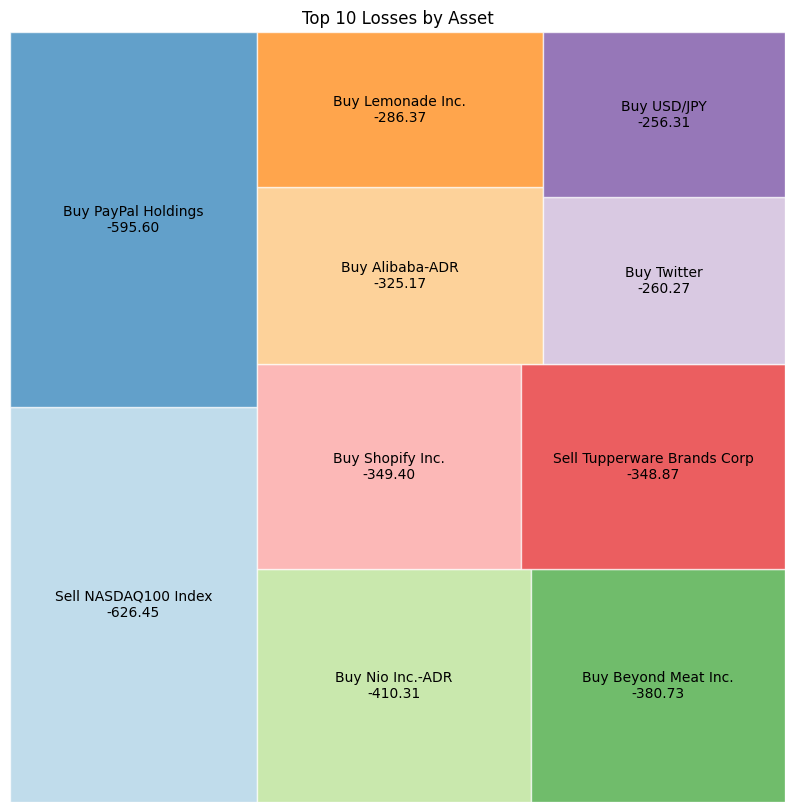

In [67]:
import squarify
import matplotlib.pyplot as plt

grouped_losses = closed_positions.groupby('Action')['Profit(USD)'].sum().reset_index()
top_10_losses = grouped_losses.nsmallest(10, 'Profit(USD)')

values = top_10_losses['Profit(USD)'].values
norm_values = squarify.normalize_sizes(values, dx=100, dy=100)

labels = [f"{action}\n{profit:.2f}" for action, profit in zip(top_10_losses['Action'], top_10_losses['Profit(USD)'])]

plt.figure(figsize=(10, 10))
squarify.plot(sizes=norm_values, label=labels, alpha=0.7, color=plt.cm.Paired.colors, edgecolor='white')
plt.axis('off')
plt.title('Top 10 Losses by Asset')
plt.show()
